In [34]:
# keltner channel trading strategy

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# function to calculate the keltner channel
def keltner_channels(data, window=20, atr_multiplier = 1):

  #Empty dictonary
  keltner_channels = {}

  #Calculate the normal price
  typical_price = (data['High'] + data['Low'] + data['Close']) / 3

  #Calculate the EMA
  exponential_moving_average = typical_price.ewm(span=window, adjust=False).mean()

  #Calculate ATR
  true_range = np.maximum(data['High'] - data['Low'], np.maximum(abs(data['High'] - exponential_moving_average), abs(data['Low'] - exponential_moving_average)))
  average_true_range = true_range.ewm(span = window, adjust = False).mean()

  #Calculate the keltner channel upper/lower band
  keltner_channels['upper'] = exponential_moving_average + atr_multiplier * average_true_range
  keltner_channels['lower'] = exponential_moving_average - atr_multiplier * average_true_range

  #Calculate the middle band now
  keltner_channels['middle'] = exponential_moving_average

  return keltner_channels

In [37]:
def plot_keltner_channels(data, keltner_channels):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(data.index, data['Close'], label='Close')

    # Plot the Keltner channel upper, lower, middle bands
    ax.plot(keltner_channels['upper'], label="Upper Band")
    ax.plot(keltner_channels['lower'], label="Lower Band")
    ax.plot(keltner_channels['middle'], label="Middle Band")

    # Shades between upper and lower band
    ax.fill_between(keltner_channels['upper'].index, keltner_channels['upper'], keltner_channels['lower'], color='grey', alpha=0.5)

    # Plot the buy and sell signals
    crossed = False
    buy_signal_number = 0
    sell_signal_number = 0
    buy_signal_restraint = 1
    sell_signal_restraint = 1

    for i in range(len(data)):
        if data['Close'].iloc[i] < keltner_channels['lower'].iloc[i]:
            buy_signal_number += 1
            sell_signal_number = 0
            if buy_signal_number >= buy_signal_restraint and not crossed:
                ax.plot(data.index[i], data['Close'].iloc[i], marker='^', markersize=7, color='green')
                crossed = True
                buy_signal_number = 0
        elif data['Close'].iloc[i] > keltner_channels['upper'].iloc[i]:
            sell_signal_number += 1
            buy_signal_number = 0
            if sell_signal_number >= sell_signal_restraint and crossed:
                ax.plot(data.index[i], data['Close'].iloc[i], marker='v', markersize=10, color='red')
                crossed = False
                sell_signal_number = 0

    # Format the plot
    ax.set_title('Buy/Sell Signals Trading Bot')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    plt.show()


In [38]:
data = pd.read_csv('AAPL3.csv')
print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     2020-01-02   74.059998   75.150002   73.797501   75.087502   72.876106   
1     2020-01-03   74.287498   75.144997   74.125000   74.357498   72.167603   
2     2020-01-06   73.447502   74.989998   73.187500   74.949997   72.742653   
3     2020-01-07   74.959999   75.224998   74.370003   74.597504   72.400551   
4     2020-01-08   74.290001   76.110001   74.290001   75.797501   73.565193   
...          ...         ...         ...         ...         ...         ...   
1001  2023-12-22  195.179993  195.410004  192.970001  193.600006  192.868149   
1002  2023-12-26  193.610001  193.889999  192.830002  193.050003  192.320221   
1003  2023-12-27  192.490005  193.500000  191.089996  193.149994  192.419830   
1004  2023-12-28  194.139999  194.660004  193.169998  193.580002  192.848206   
1005  2023-12-29  193.899994  194.399994  191.729996  192.529999  191.802170   

         Volume  
0     135480400  
1  

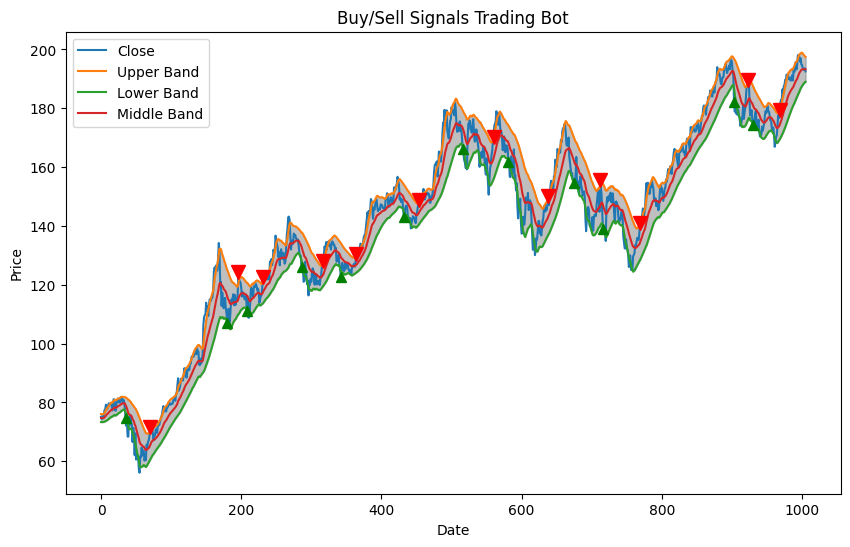

In [39]:
keltner_channels = keltner_channels(data, window=20, atr_multiplier = 1)
plot_keltner_channels(data, keltner_channels)